In [123]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [129]:
## read data
data = pd.read_csv("data/Social_Network_Ads.csv")

In [111]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [112]:
data.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

# 1. Reformat data

In [130]:
data = data.drop("User ID", axis='columns')


In [131]:
lbl = LabelEncoder()
import numpy as np
data["Gender"] = lbl.fit_transform(data['Gender']) # 2 steps: fit => transform
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data["Age"] = scaler.fit_transform(np.reshape(data['Age'].array,(-1,1)))
data["EstimatedSalary"] = scaler.fit_transform(np.reshape(data['EstimatedSalary'].array,(-1,1)))

In [126]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0.023810,0.029630,0
1,15810944,1,0.404762,0.037037,0
2,15668575,0,0.190476,0.207407,0
3,15603246,0,0.214286,0.311111,0
4,15804002,1,0.023810,0.451852,0
...,...,...,...,...,...
395,15691863,0,0.666667,0.192593,1
396,15706071,1,0.785714,0.059259,1
397,15654296,0,0.761905,0.037037,1
398,15755018,1,0.428571,0.133333,0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    int32  
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 11.1 KB


In [64]:
from sklearn.model_selection import train_test_split

In [ ]:
## seed / random seed / random state
#### reproducibility 

# 2. Train test split

In [132]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3,random_state=422)

In [118]:
X_test

,Gender,Age,EstimatedSalary
249,0,0.404762,0.607407
370,0,1.000000,0.229630
321,0,0.833333,0.496296
30,1,0.309524,0.437037
254,0,0.761905,0.214815
...,...,...,...
350,0,0.476190,0.725926
72,0,0.047619,0.059259
144,0,0.380952,0.074074
225,1,0.452381,0.281481


# 3. Modeling

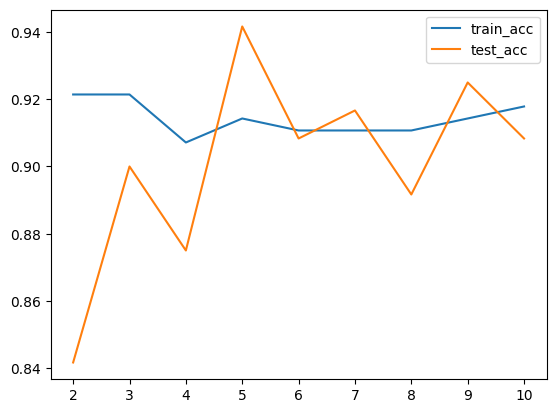

In [133]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []
### k nen la so le, k should > 1, k!= N
for k in range(2,11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    tr_ac = neigh.score(X_train,y_train)
    te_ac = neigh.score(X_test,y_test)
    train_acc.append(tr_ac)
    test_acc.append(te_ac)

# plot accuracy to select k
from matplotlib import pyplot as plt
X_label = list(range(2,11))
plt.plot(X_label,train_acc,label='train_acc')
plt.plot(X_label,test_acc,label='test_acc')
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import classification_report

In [120]:
fk=7
neigh = KNeighborsClassifier(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(classification_report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.9189    0.9444    0.9315        72
           1     0.9130    0.8750    0.8936        48

    accuracy                         0.9167       120
   macro avg     0.9160    0.9097    0.9126       120
weighted avg     0.9166    0.9167    0.9164       120



In [121]:
fk=10
neigh = KNeighborsClassifier(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(classification_report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.8961    0.9583    0.9262        72
           1     0.9302    0.8333    0.8791        48

    accuracy                         0.9083       120
   macro avg     0.9132    0.8958    0.9026       120
weighted avg     0.9098    0.9083    0.9074       120



In [122]:
fk=1
neigh = KNeighborsClassifier(n_neighbors=fk)
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
print(classification_report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.8784    0.9028    0.8904        72
           1     0.8478    0.8125    0.8298        48

    accuracy                         0.8667       120
   macro avg     0.8631    0.8576    0.8601       120
weighted avg     0.8662    0.8667    0.8662       120

